# Load saved config

In [679]:
import yaml
config_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_config_fixed acidity.yaml'

with open(config_file, 'r') as file:
    try:
        config = yaml.safe_load(file)
        common_bins = config['common_bins']
    except yaml.YAMLError as exc:
        print(exc)
        
common_bins



False

# Load previous data

In [680]:
import pandas as pd
import pickle
previous_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_fixed acidity.pkl'

with open(previous_file, "rb") as handle:
    previous = pickle.load(handle)

print(f'Num results: {previous.shape}')
previous


Num results: (84,)


recommend  predicted                    
False      False      [4.5, 4.71087)         1
                      [4.71087, 4.92174)     3
                      [4.92174, 5.13261)     5
                      [5.13261, 5.34348)     6
                      [5.34348, 5.55435)     4
                                            ..
True       True       [7.4, 7.7)            18
                      [7.7, 8)               8
                      [8, 8.3)               9
                      [8.3, 8.6)             1
                      [8.6, 8.9]             2
Length: 84, dtype: object

 # Load previous bins

In [681]:
bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_fixed acidity.pkl'            
with open(bin_file, "rb") as handle:
    bins = pickle.load(handle)
bins

recommend  predicted
False      False        [4.5, 4.710869565217391, 4.921739130434783, 5....
           True         [3.8, 4.1375, 4.475, 4.8125, 5.149999999999999...
True       False        [5.6, 6.05, 6.5, 6.949999999999999, 7.39999999...
           True         [4.7, 5.0, 5.3, 5.6, 5.9, 6.2, 6.5, 6.80000000...
Name: fixed acidity, dtype: object

# TODO need to test categorical data

# Plot previous data

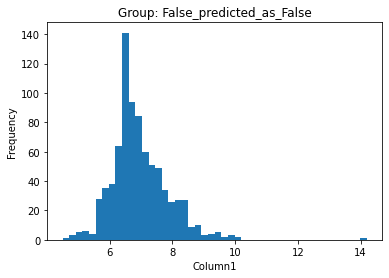

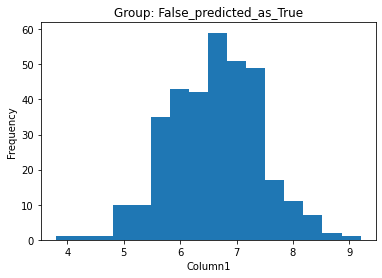

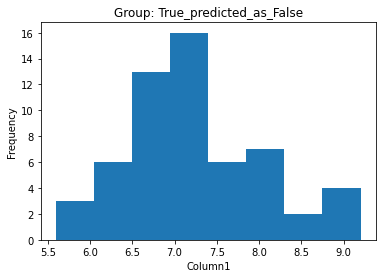

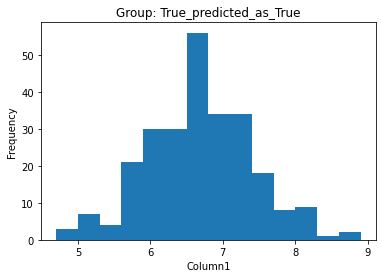

In [682]:
from pandas import MultiIndex
import matplotlib.pyplot as plt

xlab = 'Column1'

for y_true, y_pred in previous.index.droplevel(-1).unique():   
    counts = previous.loc[(y_true, y_pred)]
    
    if common_bins:
        b = bins.values
    else:
        b = bins.loc[(y_true, y_pred)]
    

    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(counts.values),
        weights=counts.values,
        range=(b.min(), b.max()),
    )
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")

    plt.show(block=False)

# Load new data

In [683]:
import pandas as pd
import pickle

# new = previous + 20
# new

new_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_10_fixed acidity.pkl'

with open(new_file, "rb") as handle:
    new = pickle.load(handle)

print(f'Num results: {new.shape}')
new




Num results: (40,)


recommend  predicted                
False      False      [4.5, 5.47)        16
                      [5.47, 6.44)      223
                      [6.44, 7.41)      375
                      [7.41, 8.38)      149
                      [8.38, 9.35)       40
                      [9.35, 10.32)      12
                      [10.32, 11.29)      0
                      [11.29, 12.26)      0
                      [12.26, 13.23)      0
                      [13.23, 14.2]       1
           True       [3.8, 4.34)         1
                      [4.34, 4.88)        2
                      [4.88, 5.42)       20
                      [5.42, 5.96)       43
                      [5.96, 6.5)        77
                      [6.5, 7.04)        98
                      [7.04, 7.58)       61
                      [7.58, 8.12)       28
                      [8.12, 8.66)        8
                      [8.66, 9.2]         2
True       False      [5.6, 5.96)         2
                      [5.96, 6.32)     

# Load new bins

In [684]:
import pickle

# new_bins = bins
# new_bins

new_bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_10_fixed acidity.pkl'            
with open(new_bin_file, "rb") as handle:
    new_bins = pickle.load(handle)
new_bins

recommend  predicted
False      False        [4.5, 5.47, 6.4399999999999995, 7.41, 8.379999...
           True         [3.8, 4.34, 4.88, 5.42, 5.959999999999999, 6.5...
True       False        [5.6, 5.96, 6.319999999999999, 6.68, 7.0399999...
           True         [4.7, 5.12, 5.54, 5.960000000000001, 6.3800000...
Name: fixed acidity, dtype: object

# Plot new data

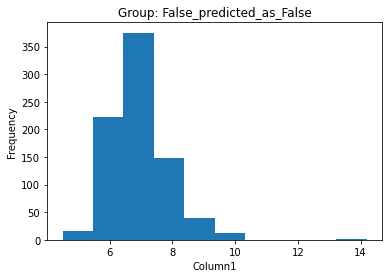

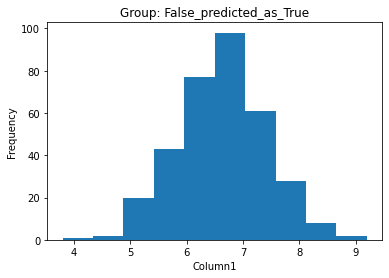

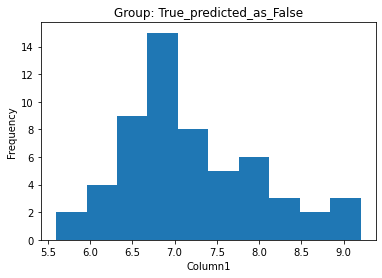

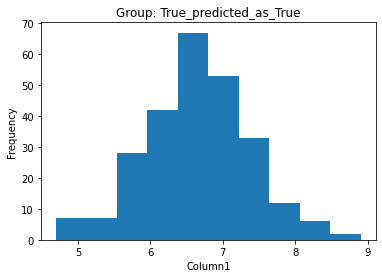

In [685]:
from pandas import MultiIndex
import matplotlib.pyplot as plt

xlab = 'Column1'

for y_true, y_pred in new.index.droplevel(-1).unique():   
    counts = new.loc[(y_true, y_pred)]

    if common_bins:
        b = new_bins.values
    else:
        b = new_bins.loc[(y_true, y_pred)]
       
    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(counts.values),
        weights=counts.values,
        range=(b.min(), b.max()),
    )
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")

    plt.show(block=False)

# Plot previous and new overlaid

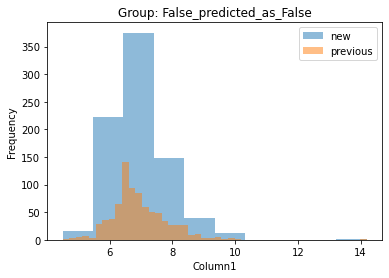

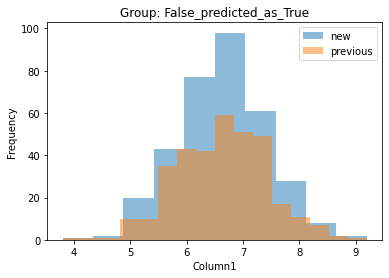

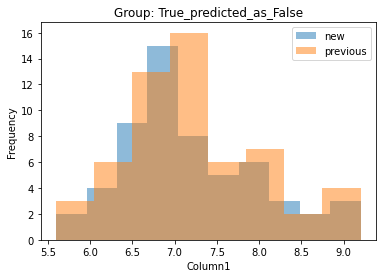

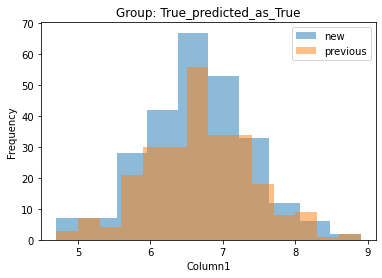

In [687]:
for y_true, y_pred in new.index.droplevel(-1).unique():   
    new_counts = new.loc[(y_true, y_pred)]
    #new_b = new_bins.values

    prev_counts = previous.loc[(y_true, y_pred)]
    #b = bins.values
    
    if common_bins:
        new_b = new_bins.values
        b = bins.values
    else:
        new_b = new_bins.loc[(y_true, y_pred)]
        b = bins.loc[(y_true, y_pred)]

    plt.hist(
        (new_b[:-1] + new_b[1:]) / 2,
        bins=len(new_counts.values),
        weights=new_counts.values,
        range=(new_b.min(), new_b.max()),
        alpha=0.5,
        label='new'
    )
          
    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(prev_counts.values),
        weights=prev_counts.values,
        range=(b.min(), b.max()),
        alpha=0.5,
        label='previous'
    )
    
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")
    plt.legend(loc='upper right')

    plt.show(block=False)
    

# Testing common_bins DEPRECATED
## Load saved config

In [601]:
import yaml
config_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_config_unit-test.yaml'

with open(config_file, 'r') as file:
    try:
        config = yaml.safe_load(file)
        common_bins = config['common_bins']
    except yaml.YAMLError as exc:
        print(exc)
        
common_bins



True

In [602]:
import pandas as pd
previous_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_results_unit-test.pkl'
with open(previous_file, "rb") as handle:
    previous = pickle.load(handle)
            
#previous = pd.read_csv(previous_file, index_col=[0, 1, 2])
print(f'Num results: {previous.shape}')
previous


Num results: (12,)


label  predicted                      
0      0          [-2.52019, -1.12853)    6
                  [-1.12853, 0.26312)     1
                  [0.26312, 1.65477]      0
       1          [-2.52019, -1.12853)    1
                  [-1.12853, 0.26312)     1
                  [0.26312, 1.65477]      1
1      0          [-2.52019, -1.12853)    0
                  [-1.12853, 0.26312)     0
                  [0.26312, 1.65477]      2
       1          [-2.52019, -1.12853)    0
                  [-1.12853, 0.26312)     0
                  [0.26312, 1.65477]      8
dtype: object

In [603]:
bin_file = '/Users/gleonard/dev/PRESC/presc_report/ConditionalDistributionResult_bins_unit-test.pkl'            
with open(bin_file, "rb") as handle:
    bins = pickle.load(handle)
bins

0   -2.520188
1   -1.128534
2    0.263120
3    1.654774
dtype: float64

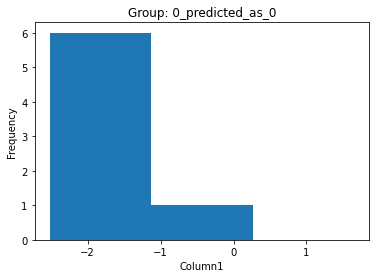

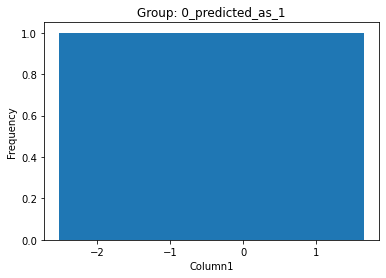

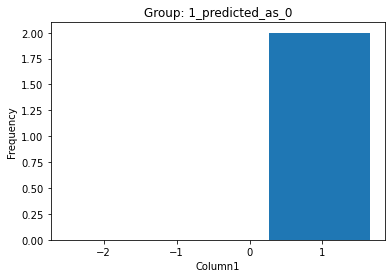

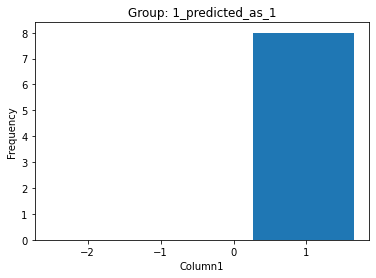

In [606]:
from pandas import MultiIndex
import matplotlib.pyplot as plt
import csv
import numpy as np
import ast
import json
import pickle

xlab = 'Column1'

for y_true, y_pred in previous.index.droplevel(-1).unique():   
    counts = previous.loc[(y_true, y_pred)]
    if common_bins:
        b = bins.values
    else:
        b = bins.loc[(y_true, y_pred)]

    plt.hist(
        (b[:-1] + b[1:]) / 2,
        bins=len(counts.values),
        weights=counts.values,
        range=(b.min(), b.max()),
    )
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(f"Group: {y_true}_predicted_as_{y_pred}")

    plt.show(block=False)

In [633]:
p = previous
p = previous + 20
p

recommend  predicted                    
False      False      [3.8, 3.97333)        20
                      [3.97333, 4.14667)    20
                      [4.14667, 4.32)       20
                      [4.32, 4.49333)       20
                      [4.49333, 4.66667)    21
                                            ..
True       True       [13.3333, 13.5067)    20
                      [13.5067, 13.68)      20
                      [13.68, 13.8533)      20
                      [13.8533, 14.0267)    20
                      [14.0267, 14.2]       20
Length: 240, dtype: object